# 1. 데이터(PUBG Finish Placement Prediction)
*   출처: https://www.kaggle.com/c/pubg-finish-placement-prediction/data

## 1-1. 데이터 불러오기

In [113]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

url = '/content/drive/MyDrive/codestates/p2/train_V2.csv'
df = pd.read_csv(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [115]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [116]:
df.duplicated().sum()

0

In [117]:
df = df.fillna(0)
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

## 1-2. column 설명

* **DBNOs** - 기절시킨 적 플레이어의 수
* **assists** - 이 플레이어가 피해를 입히고 팀 동료에 의해 사망한 플레이어의 수
* **boosts** - 사용한 부스팅 아이템의 수
* **damageDealt** - 팀킬 제외한 총 피해량
* **headshotKills** - 헤드샷으로 사망한 적 플레이어의 수
* **heals** - 사용한 치유 아이템의 수
* **Id** - 플레이어의 아이디
* **killPlace** - 이 매치의 킬 순위
* **killPoints** - 킬 수만의 외부 랭킹
* **killStreaks** - 단기간에 죽은 적의 최대 수
* **kills** - 죽인 적 플레이어의 수
* **longestKill** - 사망 시 사망한 플레이어와의 최장 거리
* **matchDuration** - 매치 시간
* **matchId** - 매치를 식별하는 아이디
* **matchType** - 게임모드를 식별(solo, duo, squad, solo-fpp, duo-fpp, squad-fpp 등)
* **rankPoints** - 플레이어의 Elo 랭킹
* **revives** - 팀원들을 소생시킨 횟수
* **rideDistance** - 차량으로 이동한 총 이동 거리(m 단위)
* **roadKills** - 차에 타고 있을 때의 킬 수
* **swimDistance** - 수영으로 이동한 총 이동거리(m 단위)
* **teamKills** - 팀원을 죽인 횟수
* **vehicleDestroys** - 차량은 파괴한 횟수
* **walkDistance** - 걸어서 이동한 총 이동 거리(m 단위)
* **weaponsAcquired** - 획득한 무기의 수
* **winPoints** - 순위로만 매겨진 랭킹
* **groupId** - 매치내 그룹을 식별하는 ID
* **numGroups** - 매치 안에 데이터가 있는 그룹의 수
* **maxPlace** - 매치 안에서의 제일 마지막 순위
* **winPlacePerc** - 예측의 타겟으로 순위 백분위 -> 상위 10%안에 들면 1, 상위 10%안에 들지 못하면 0


---
* **totalDistance** - 총 이동 거리(m 단위)
* **headshotKillsPerkills** - 킬 중에서 헤드샷 킬의 비율(킬이 없으면 -1)
* **useCar** - 차를 사용했으면 1, 차를 사용하지 않았으면 0


## 1-3. 데이터 전처리

### 1-3-1 매치 타입 별 데이터 수 확인 및 예측할 매치타입 결정

In [118]:
match_type = pd.DataFrame(df['matchType'].value_counts())
match_type.columns = ['count']
match_type

,count
squad-fpp,1756186
duo-fpp,996691
squad,626526
solo-fpp,536762
duo,313591
solo,181943
normal-squad-fpp,17174
crashfpp,6287
normal-duo-fpp,5489
flaretpp,2505


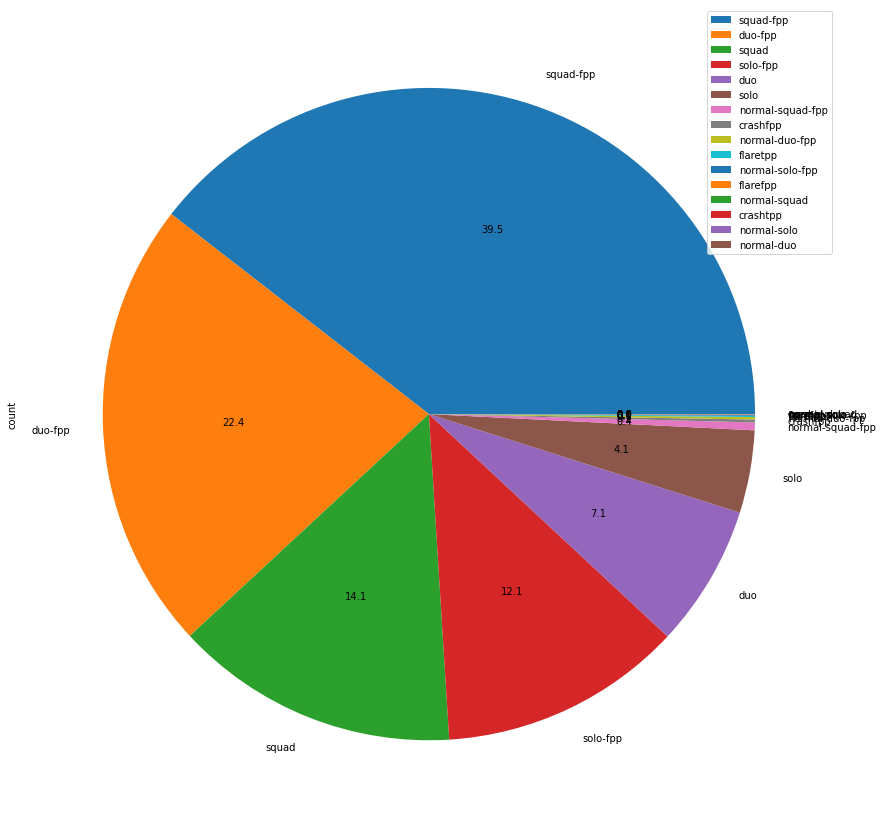

In [119]:
match_type.plot.pie(y='count', legend='True', autopct='%.1f', figsize=(15, 15));

In [120]:
match_type = match_type.drop(['normal-squad-fpp', 'crashfpp', 'normal-duo-fpp', 'flaretpp',
       'normal-solo-fpp', 'flarefpp', 'normal-squad', 'crashtpp',
       'normal-solo', 'normal-duo']) 

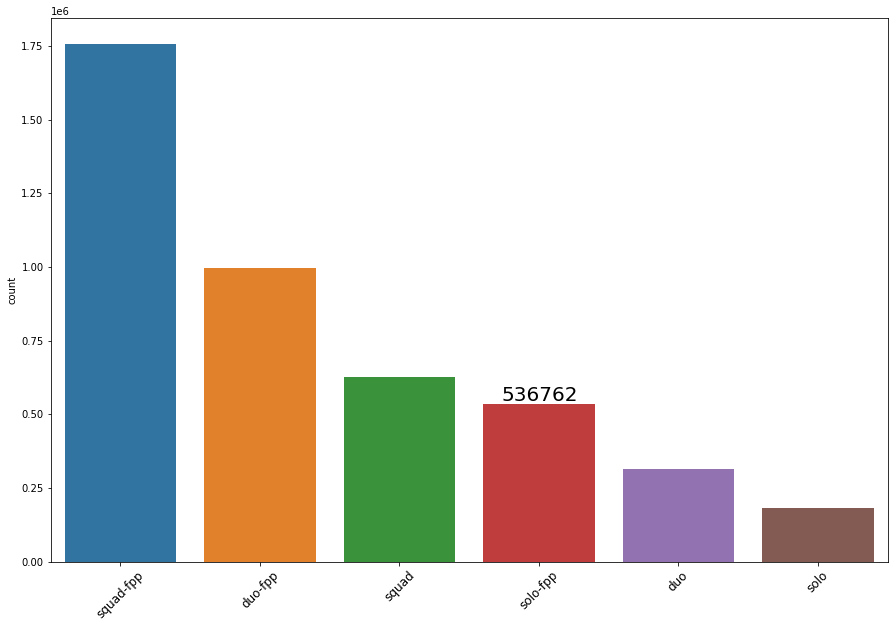

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
g = sns.barplot(data = match_type, x = match_type.index, y = "count")
ax = g
plt.text(2.73, 545000, '536762', fontsize= 20)

plt.xticks(fontsize=12, rotation=45)
plt.show()

* 약 53만개의 데이터를 가지고 있는 3인칭 solo-fpp 매치 타입의 순위 예측을 하기로 결정

### 1-3-2 match type이 solo-fpp인 데이터만 남기기

In [122]:
df_solo = df[df['matchType'] == 'solo-fpp'].reset_index(drop = True)
df_solo.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0,0,0.00,0,0,49.75,2,0,0.1875
1,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0,0,0.00,0,0,1089.00,6,1500,0.7368
2,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,...,0,1228.0,0,76.84,0,0,2050.00,6,1462,0.8750
3,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,...,0,2367.0,0,15.29,0,0,1787.00,3,0,0.8211
4,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,...,0,0.0,0,0.00,0,0,270.70,1,0,0.3474


### 1-3-3 train data / validation data / test data 분리

In [147]:
from sklearn.model_selection import train_test_split

def data_divided(df):
# target = 'winPlacePerc'
# features = ['boosts', 'damageDealt', 'headshotKills', 'heals', 'killPlace',
#        'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
#        'maxPlace', 'rankPoints', 'rideDistance', 'roadKills', 'swimDistance',
#        'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
#        'winPlacePerc', 'totalDistance', 'headshotKillsPerKills', 'useCar']
# X = df_solo[features]
# y = df_solo[target]
  train, test = train_test_split(df, test_size=0.1, random_state=1)
  train, val = train_test_split(train, test_size=0.1, random_state=1)
  return train, test, val

In [148]:
train, test, val = data_divided(df_solo)
print(train.shape, test.shape, val.shape)

(434776, 29) (53677, 29) (48309, 29)


### 1-3-4 데이터 전처리

In [149]:
import numpy as np

def eda_process(df):
  df = df.drop(['Id', 'groupId', 'matchId', 'assists', 'DBNOs', 'matchType', 'numGroups', 'revives', 'teamKills'], axis = 1)   # 필요없는 컬럼 삭제
  df['totalDistance'] = df['rideDistance'] + df['swimDistance'] + df['walkDistance']   # 총 이동거리 컬럼 추가(m 단위)
  df['headshotKillsPerKills'] = np.where(df["kills"].values == 0 , -1, round(df['headshotKills']/df['kills'],4))  # 킬중에서 헤드샷 킬의 비율(킬이 없으면 -1)
  df['useCar'] = np.where(df['rideDistance'] != 0, 0, 1) # 차를 사용했으면 1, 차를 사용하지 않았으면 0  
  
  # 매치의 플레이어 수가 90이하인 매치 삭제
  indexNames = df[df['maxPlace'] <= 90].index
  df.drop(indexNames, inplace = True)
  df.reset_index(drop = True)

  df['winPlacePerc'] = np.where(df['winPlacePerc'] < 0.9, '0', '1')   # 상위 10% 안에 들었으면 1, 상위 10%안에 들지 못했으면 0으로 변경
  return df

In [150]:
train = eda_process(train)
test = eda_process(test)
val = eda_process(val)

In [151]:
print(train.shape, test.shape, val.shape)

(407279, 23) (50212, 23) (45229, 23)


In [152]:
train.columns

Index(['boosts', 'damageDealt', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'maxPlace', 'rankPoints', 'rideDistance', 'roadKills', 'swimDistance',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'totalDistance', 'headshotKillsPerKills', 'useCar'],
      dtype='object')

In [162]:
def divide_X_y(df):
  target = 'winPlacePerc'
  features = ['boosts', 'damageDealt', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'maxPlace', 'rankPoints', 'rideDistance', 'roadKills', 'swimDistance',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'totalDistance', 'headshotKillsPerKills', 'useCar']
  X = df[features]
  y = df[target]
  return X, y

In [163]:
X_train, y_train = divide_X_y(train)
X_test, y_test = divide_X_y(test)
X_val, y_val = divide_X_y(val)

In [164]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(407279, 22) (407279,)
(50212, 22) (50212,)
(45229, 22) (45229,)
